In [2]:
import numpy as np

A = np.array([
    [100,10,3],
    [200,10,2],
    [300,10,1]
])

def col_dot(M, v):
    col_sum = np.zeros((len(M), 1))
    for col_idx in range(M.shape[1]):
        col = M[:, col_idx:col_idx+1] * v[col_idx,0]
        #print(col, "\n")
        col_sum += col
    return col_sum

x = np.array([1,0,-1]).reshape(-1,1) # TODO
col_dot(A, x)

array([[ 97.],
       [198.],
       [299.]])

# Part 2

In [3]:
A = np.array([
    [5,0,0],
    [0,15,0],
    [0,0,3],
    [-1,-1,-1],
])
A

array([[ 5,  0,  0],
       [ 0, 15,  0],
       [ 0,  0,  3],
       [-1, -1, -1]])

In [5]:
claim = np.array([[15],
       [15],
       [15],
       [-9]])

In [6]:
x = np.array([3,1,5]).reshape(-1,1)
A.dot(x)

array([[15],
       [15],
       [15],
       [-9]])

# Part 3

In [9]:
def mystery(row):
    # pretend we can't see this code
    return row[2] - row[0]

A = np.array([
    [1,9,4],
    [1,10,4],
    [2,19,8],
])
b = np.array([[mystery(row)] for row in A])
print("b (outputs):", b)

x = np.linalg.solve(A, b)
print("x coefficients:", x)

def model(row):
    return row.dot(x)

print("model works like mystery!", model(np.array([[1,9,4]])))
print("And we can call it with new values!", model(np.array([[4,5,10]])))

b (outputs): [[3]
 [3]
 [6]]


LinAlgError: Singular matrix

# Part 4

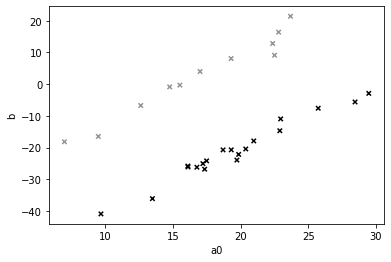

In [10]:
import numpy as np
import pandas as pd
a0 = np.random.normal(20, 5, 30)
a1 = np.random.randint(low=1, high=3, size=30)
noise = np.random.normal(0, 3, 30)
b = a0 * 2 - a1*30 + noise
df = pd.DataFrame({"a0":a0, "a1":a1, "b":b})
df.plot.scatter(x="a0", y="b", c=df["a1"], vmin=0, marker="x")

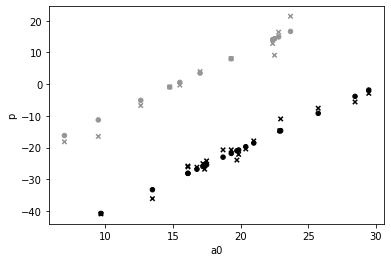

In [11]:
A = df.values[:, :2]
P = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T)
df["p"] = P.dot(df["b"])

ax=df.plot.scatter(x="a0", y="b", c=df["a1"], vmin=0, marker="x")
df.plot.scatter(x="a0", y="p", c=df["a1"], vmin=0, marker="o", ax=ax)